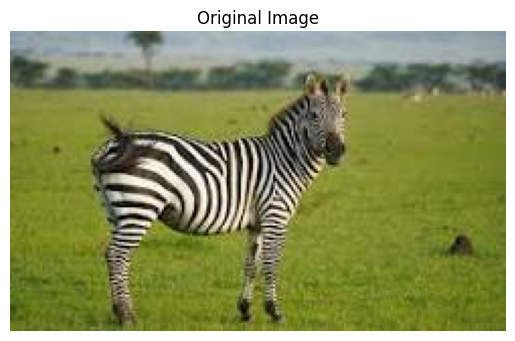

Shape: (148, 245, 3), Data Type: uint8


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\pc\Desktop\2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

print(f"Shape: {img.shape}, Data Type: {img.dtype}")


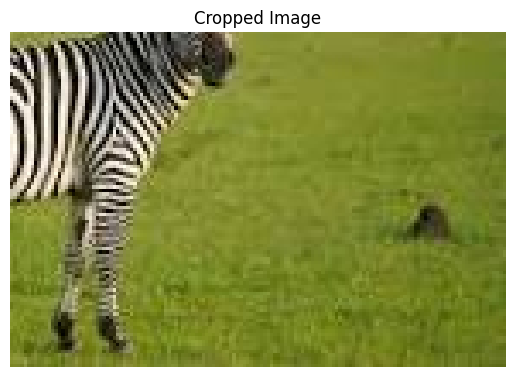

In [4]:
resized = cv2.resize(img, (300, 200))
flipped = cv2.flip(img, 1)  # Horizontal flip
cropped = img[50:200, 100:300]

plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()


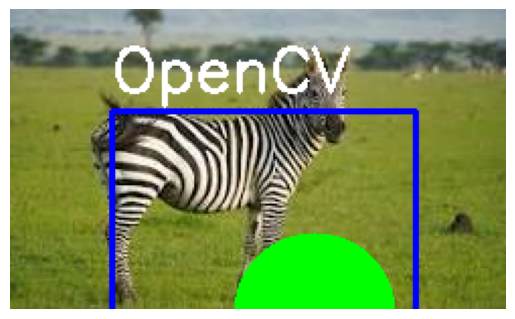

In [5]:
draw = img.copy()
cv2.rectangle(draw, (50, 50), (200, 200), (255, 0, 0), 2)
cv2.circle(draw, (150, 150), 40, (0, 255, 0), -1)
cv2.putText(draw, "OpenCV", (50, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

plt.imshow(cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


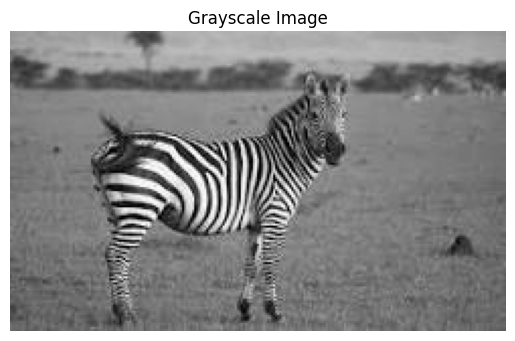

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


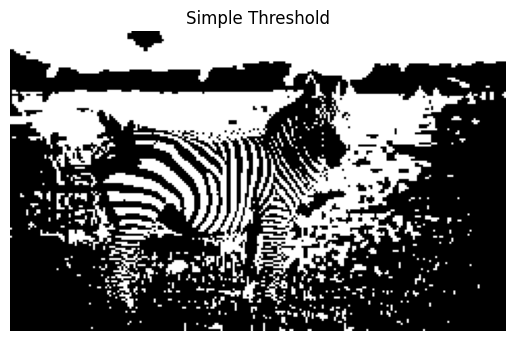

In [7]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.title("Simple Threshold")
plt.axis('off')
plt.show()


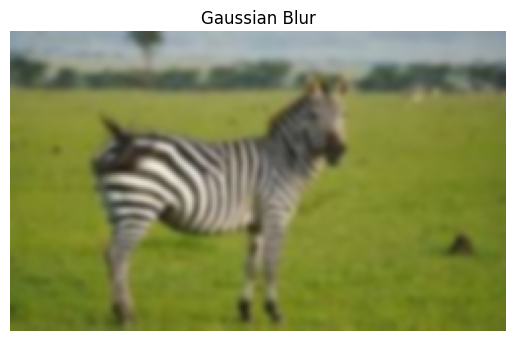

In [8]:
blur = cv2.GaussianBlur(img, (7, 7), 0)
median = cv2.medianBlur(img, 5)

plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.show()


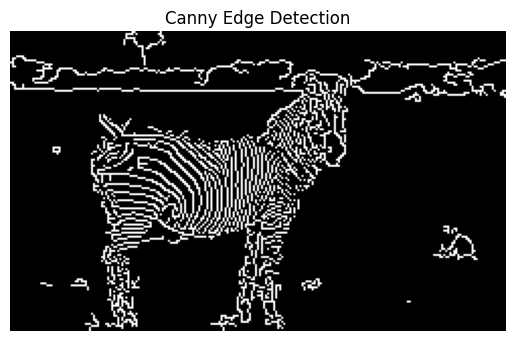

In [9]:
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


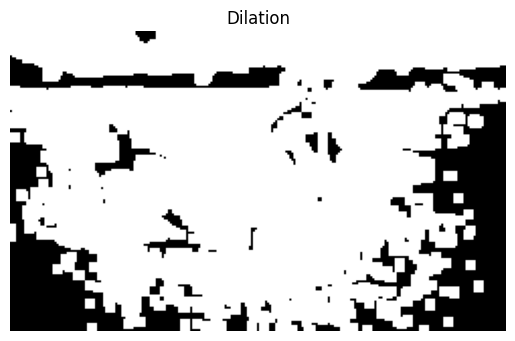

In [10]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
erosion = cv2.erode(thresh, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis('off')
plt.show()


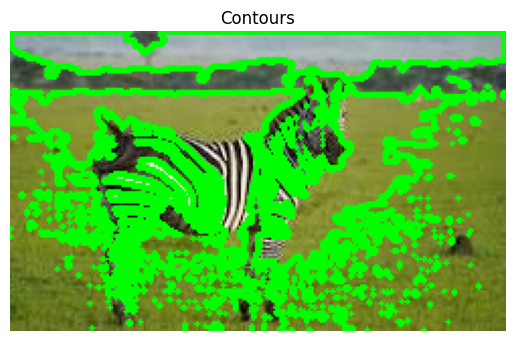

In [11]:
cont_img = img.copy()
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(cont_img, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis('off')
plt.show()


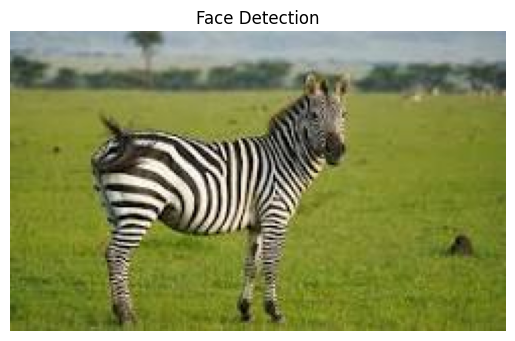

In [12]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

img_faces = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(img_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB))
plt.title("Face Detection")
plt.axis('off')
plt.show()
